## Imports

In [ ]:
%reload_ext autoreload
%autoreload 2
from IPython.display import Math
from tqdm import tqdm
import sys
import os
parent_path = os.path.abspath("..")
if parent_path not in sys.path:
    sys.path.append(parent_path)

# For a quick config:
# import logging
# logging.basicConfig(
#     format="%(asctime)s [%(levelname)s] [%(name)s]: %(message)s",
#     level=logging.DEBUG
# )

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import sympy
import numpy as np
import numpy.typing as npt
import typing
from typing import Callable, Dict, List, Optional, Tuple, Union, Iterable
import qutip # type: ignore

from src.quantum_utils import measure_povm
from src.povms import sic_povm, mub_povm, random_rank1_povm
from src.qelm_utils import analyze_biasvar_vs_nstates, analyze_biasvar_vs_statistics

from src.shadow_tomography import frame_operator
from src.utils import pp_matrix
from src import QELM

def make_cube_states():
    # compute the vertices of a unit cube
    vertices = np.array([[x, y, z] for x in [-1, 1] for y in [-1, 1] for z in [-1, 1]], dtype=float)
    # normalize the vertices to lie on the unit sphere
    vertices /= np.linalg.norm(vertices, axis=1)[:, np.newaxis]
    # for each vector in vertices, compute the density matrix (I + v\cdot\sigma)/2
    sigma_matrices = [qutip.sigmax(), qutip.sigmay(), qutip.sigmaz()]
    cube_states = []
    for v in vertices:
        sigma_v = sum(v[i] * sigma_matrices[i] for i in range(3))
        dm = (qutip.qeye(2) + sigma_v) / 2
        cube_states.append(dm)
    return cube_states
cube_states = make_cube_states()
sic_states = [2 * effect for effect in sic_povm()]
mub_states = [3 * effect for effect in mub_povm()]

ImportError: cannot import name 'sic_povm' from 'src.quantum_utils' (c:\Users\utente\OneDrive - UNIPA\projects\QELM&QRC\2023 Shadow QELM review\python\src\quantum_utils.py)

In [139]:
print(measure_povm(
    states=[2 * effect for effect in sic_povm()],
    povm=sic_povm(),
    statistics=100,
    return_frequencies=True, sampling_method='poisson'
))

print(measure_povm(
    states=[2 * effect for effect in sic_povm()],
    povm=sic_povm(),
    statistics=100,
    return_frequencies=True
))

[[0.58 0.13 0.19 0.21]
 [0.14 0.48 0.06 0.09]
 [0.12 0.17 0.52 0.14]
 [0.15 0.21 0.15 0.5 ]]
[[0.49 0.12 0.17 0.17]
 [0.2  0.47 0.16 0.15]
 [0.14 0.27 0.54 0.17]
 [0.17 0.14 0.13 0.51]]


# New plots

In [133]:
np.logspace(0, 3, endpoint=False, num=30, base=10)
# compute the divisors of 1000 using a ready made function
import sympy
print(list(np.sort(100 // np.array(sympy.divisors(100), dtype=int))))
print(list(np.sort(1000 // np.array(sympy.divisors(1000), dtype=int))))
print(list(np.sort(10000 // np.array(sympy.divisors(10000), dtype=int))))
print(list(np.sort(10**5 // np.array(sympy.divisors(10**5), dtype=int))))

[1, 2, 4, 5, 10, 20, 25, 50, 100]
[1, 2, 4, 5, 8, 10, 20, 25, 40, 50, 100, 125, 200, 250, 500, 1000]
[1, 2, 4, 5, 8, 10, 16, 20, 25, 40, 50, 80, 100, 125, 200, 250, 400, 500, 625, 1000, 1250, 2000, 2500, 5000, 10000]
[1, 2, 4, 5, 8, 10, 16, 20, 25, 32, 40, 50, 80, 100, 125, 160, 200, 250, 400, 500, 625, 800, 1000, 1250, 2000, 2500, 3125, 4000, 5000, 6250, 10000, 12500, 20000, 25000, 50000, 100000]


## MUBs

Number of States (n_states): 100%|██████████| 9/9 [00:08<00:00,  1.01states/s]


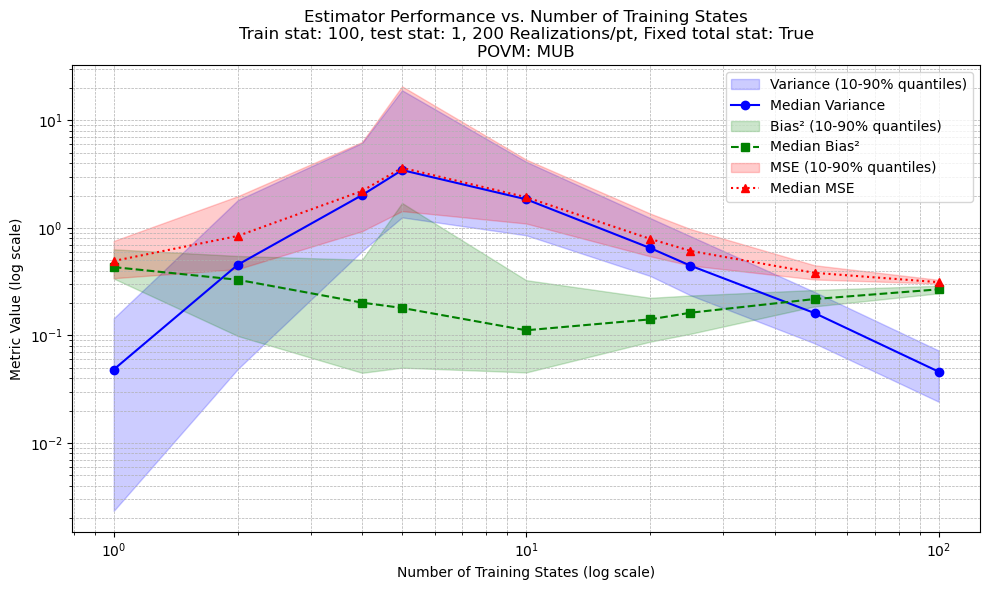

In [41]:
analyze_biasvar_vs_nstates(
    povm=mub_povm(),
    target_observable=qutip.sigmaz(),
    n_states_list=[1, 2, 4, 5, 10, 20, 25, 50, 100],
    n_realizations=200,
    train_statistics=100,
    test_statistics=1,
    quantiles=(0.1, 0.9),
    fix_total_statistics=True
);

Number of States (n_states): 100%|██████████| 16/16 [00:10<00:00,  1.47states/s]


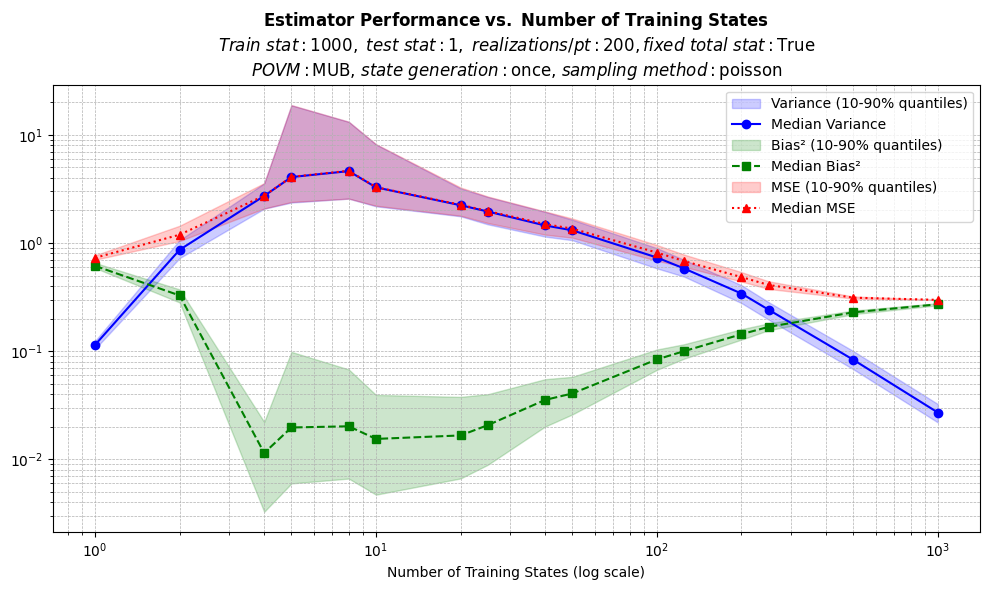

In [6]:
analyze_biasvar_vs_nstates(
    povm=mub_povm(),
    target_observable=qutip.sigmaz(),
    n_states_list=[1, 2, 4, 5, 8, 10, 20, 25, 40, 50, 100, 125, 200, 250, 500, 1000],
    n_realizations=200,
    train_statistics=1000,
    test_statistics=1,
    quantiles=(0.1, 0.9),
    fix_total_statistics=True,
    sampling_method='poisson', generate_states='once'
);

Number of States (n_states): 100%|██████████| 16/16 [01:27<00:00,  5.45s/states]


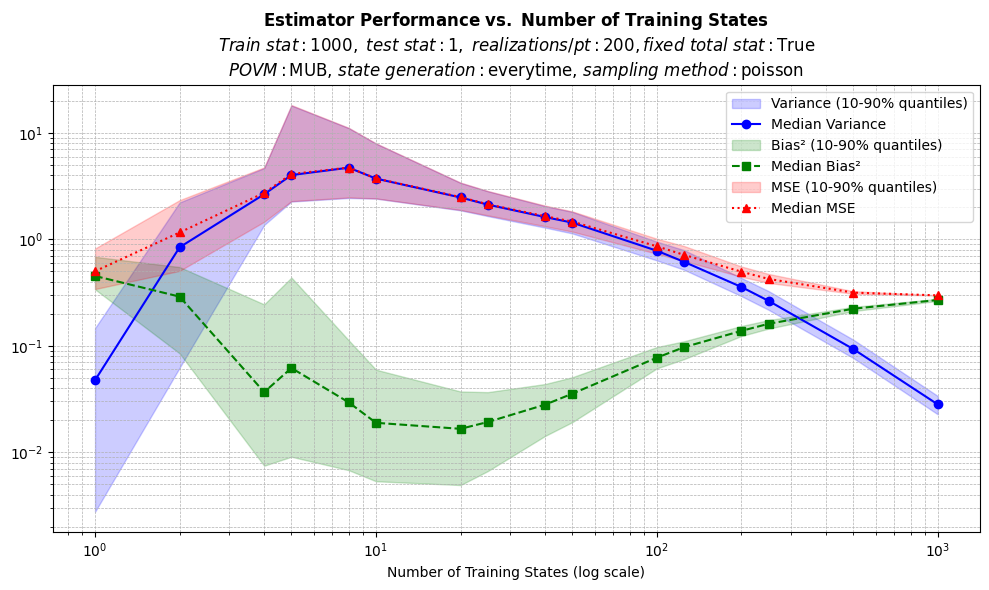

In [5]:
analyze_biasvar_vs_nstates(
    povm=mub_povm(),
    target_observable=qutip.sigmaz(),
    n_states_list=[1, 2, 4, 5, 8, 10, 20, 25, 40, 50, 100, 125, 200, 250, 500, 1000],
    n_realizations=200,
    train_statistics=1000,
    test_statistics=1,
    quantiles=(0.1, 0.9),
    fix_total_statistics=True,
    sampling_method='poisson'
);

Number of States (n_states): 100%|██████████| 13/13 [00:51<00:00,  3.96s/states]


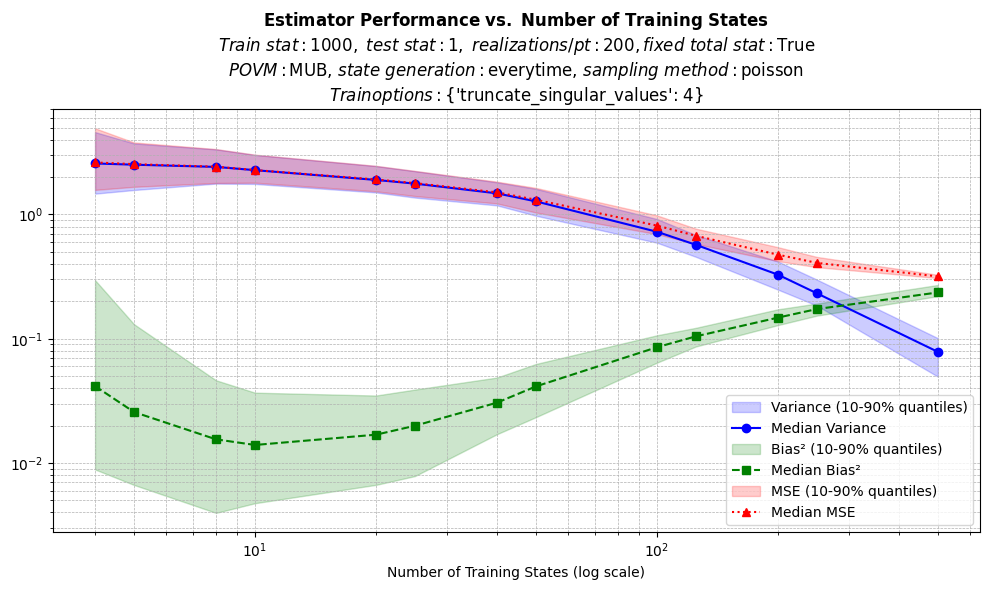

In [ ]:
analyze_biasvar_vs_nstates(
    povm=mub_povm(),
    target_observable=qutip.sigmaz(),
    n_states_list=[4, 5, 8, 10, 20, 25, 40, 50, 100, 125, 200, 250, 500],
    n_realizations=200,
    train_statistics=1000, generate_states='everytime',
    test_statistics=1,
    quantiles=(0.1, 0.9),
    fix_total_statistics=True,
    sampling_method='poisson', train_options=dict(truncate_singular_values=4)
);

Number of States (n_states): 100%|██████████| 20/20 [04:13<00:00, 12.65s/states]


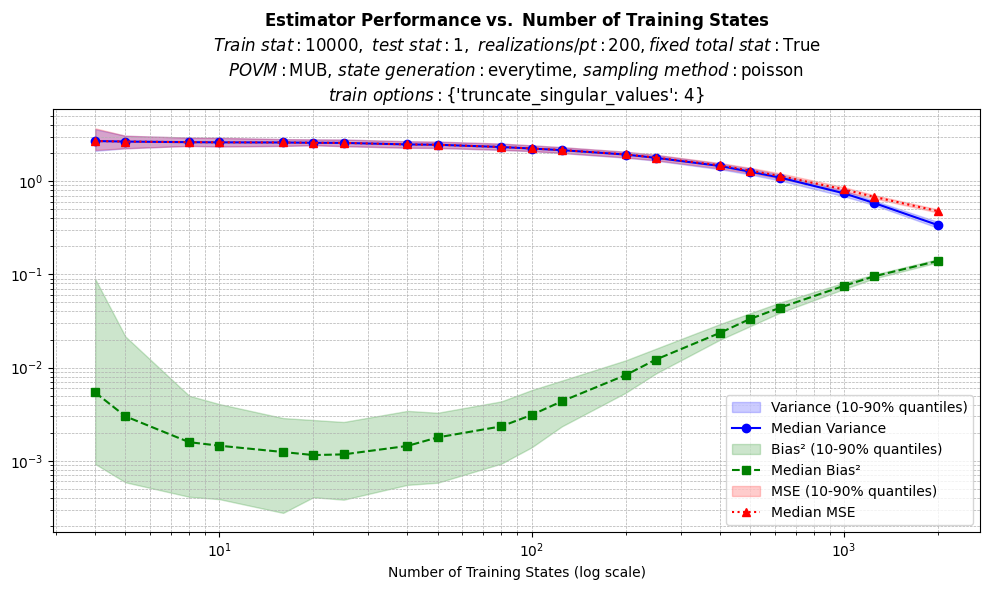

In [17]:
analyze_biasvar_vs_nstates(
    povm=mub_povm(),
    target_observable=qutip.sigmaz(),
    n_states_list=[4, 5, 8, 10, 16, 20, 25, 40, 50, 80, 100, 125, 200, 250, 400, 500, 625, 1000, 1250, 2000],
    n_realizations=200,
    train_statistics=10**4, generate_states='everytime',
    test_statistics=1,
    quantiles=(0.1, 0.9),
    fix_total_statistics=True,
    sampling_method='poisson', train_options=dict(truncate_singular_values=4)
);

Number of States (n_states): 100%|██████████| 16/16 [01:13<00:00,  4.61s/states]


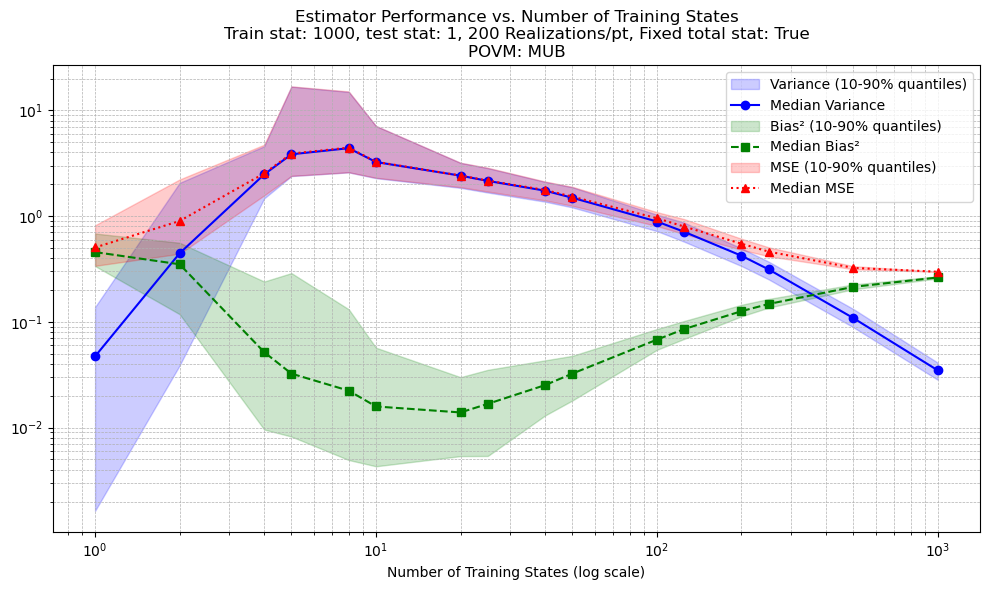

In [44]:
analyze_biasvar_vs_nstates(
    povm=mub_povm(),
    target_observable=qutip.sigmaz(),
    n_states_list=[1, 2, 4, 5, 8, 10, 20, 25, 40, 50, 100, 125, 200, 250, 500, 1000],
    n_realizations=200,
    train_statistics=1000,
    test_statistics=1,
    quantiles=(0.1, 0.9),
    fix_total_statistics=True
);

Number of States (n_states): 100%|██████████| 25/25 [11:26<00:00, 27.45s/states] 


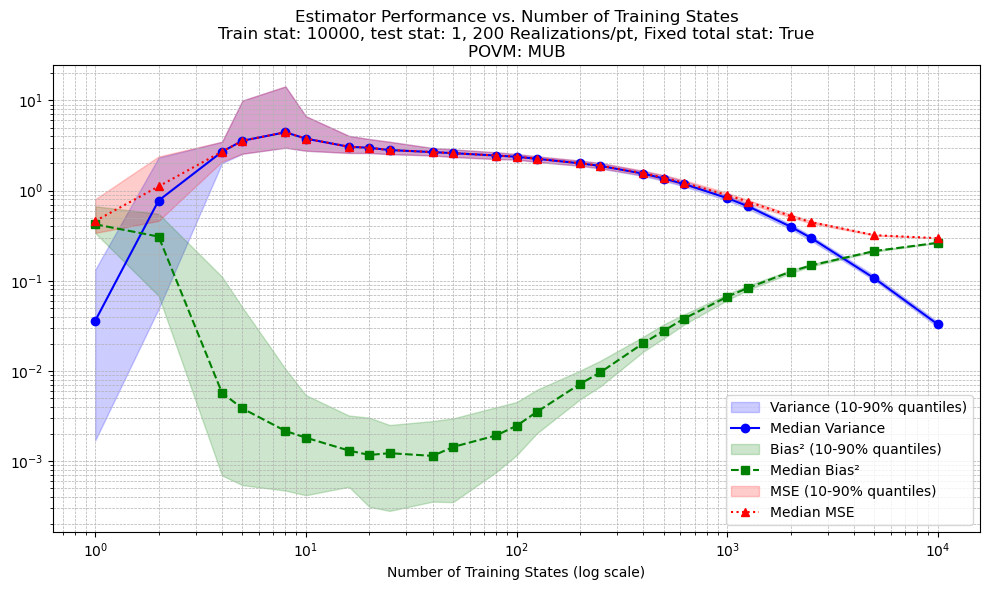

In [45]:
analyze_biasvar_vs_nstates(
    povm=mub_povm(),
    target_observable=qutip.sigmaz(),
    n_states_list=[1, 2, 4, 5, 8, 10, 16, 20, 25, 40, 50, 80, 100, 125, 200, 250, 400, 500, 625, 1000, 1250, 2000, 2500, 5000, 10000],
    n_realizations=200,
    train_statistics=10000,
    test_statistics=1,
    quantiles=(0.1, 0.9),
    fix_total_statistics=True
);

Number of States (n_states): 100%|██████████| 34/34 [08:42<00:00, 15.36s/states]


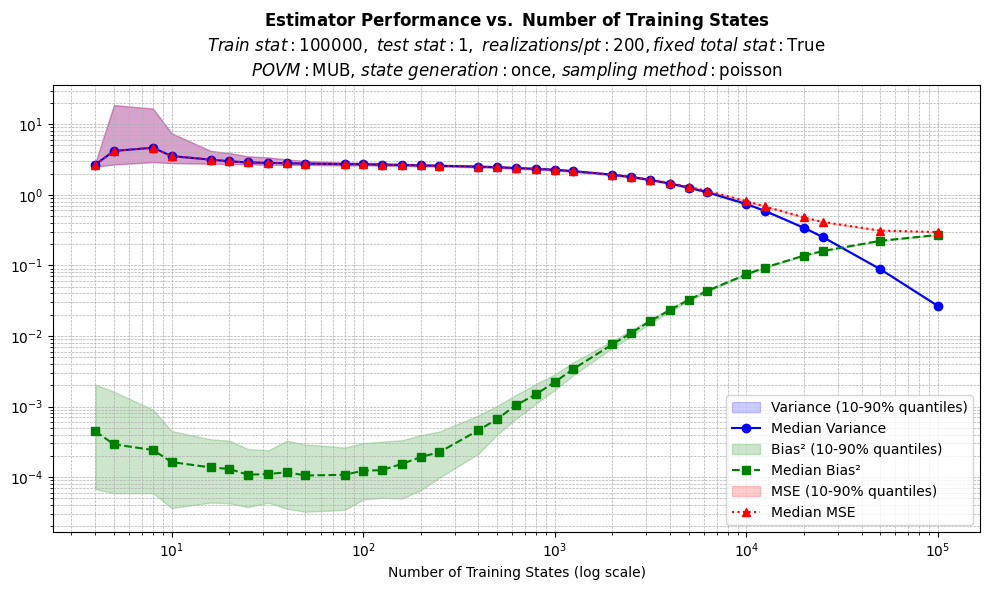

In [3]:
analyze_biasvar_vs_nstates(
    povm=mub_povm(),
    target_observable=qutip.sigmaz(),
    n_states_list=[4, 5, 8, 10, 16, 20, 25, 32, 40, 50, 80, 100, 125, 160, 200, 250, 400, 500, 625, 800, 1000, 1250, 2000, 2500, 3125, 4000, 5000, 6250, 10000, 12500, 20000, 25000, 50000, 100000],
    n_realizations=200,
    train_statistics=10**5, fix_total_statistics=True,
    test_statistics=1,
    quantiles=(0.1, 0.9),
    generate_states='once', sampling_method='poisson'
);

Number of States (n_states): 100%|██████████| 36/36 [2:11:31<00:00, 219.22s/states] 


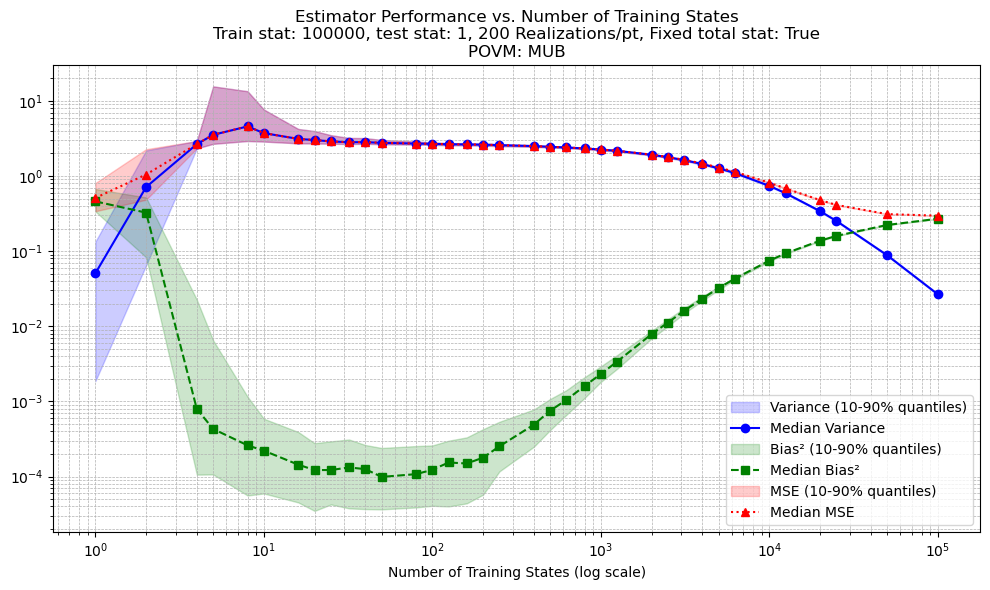

In [134]:
analyze_biasvar_vs_nstates(
    povm=mub_povm(),
    target_observable=qutip.sigmaz(),
    n_states_list=[1, 2, 4, 5, 8, 10, 16, 20, 25, 32, 40, 50, 80, 100, 125, 160, 200, 250, 400, 500, 625, 800, 1000, 1250, 2000, 2500, 3125, 4000, 5000, 6250, 10000, 12500, 20000, 25000, 50000, 100000],
    n_realizations=200,
    train_statistics=10**5,
    test_statistics=1,
    quantiles=(0.1, 0.9),
    fix_total_statistics=True,
    train_options=dict(sampling_method='poisson')
);

In [1]:
analyze_biasvar_vs_nstates(
    povm=mub_povm(),
    target_observable=QuantumOperator(qutip.sigmaz().full()),
    n_states_list=[2, 4, 5, 6, 7, 8, 10, 20, 25, 40, 50, 100, 125, 200, 250, 500],
    n_realizations=200,
    train_statistics=1000,
    test_statistics=1,
    quantiles=(0.1, 0.9),
    fix_total_statistics=False
);

NameError: name 'analyze_biasvar_vs_nstates' is not defined

Number of States (n_states): 100%|██████████| 16/16 [00:48<00:00,  3.03s/states]


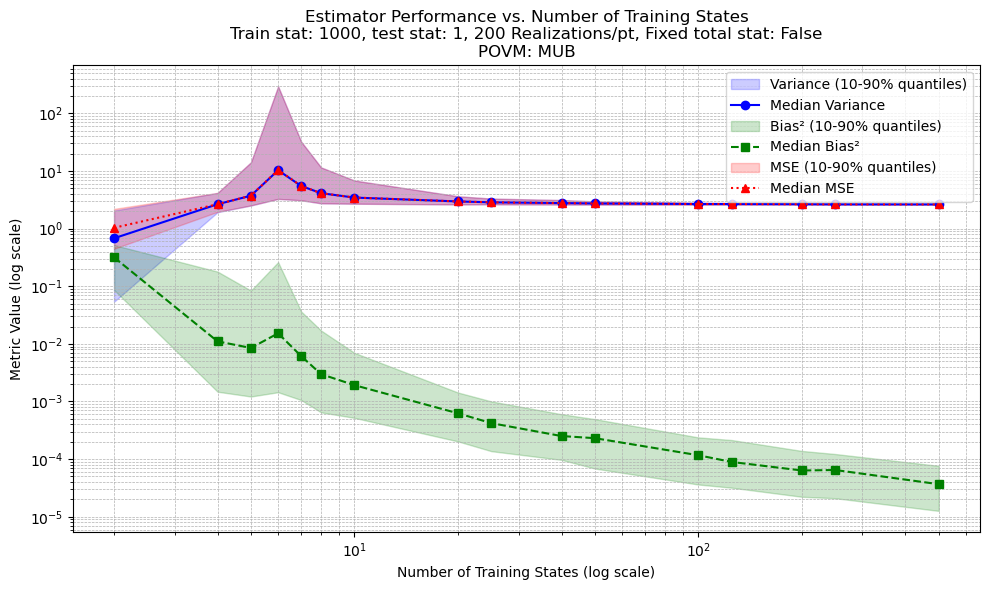

In [36]:
analyze_biasvar_vs_nstates(
    povm=mub_povm(),
    target_observable=qutip.sigmaz(),
    n_states_list=[2, 4, 5, 6, 7, 8, 10, 20, 25, 40, 50, 100, 125, 200, 250, 500],
    n_realizations=200,
    train_statistics=1000,
    test_statistics=1,
    quantiles=(0.1, 0.9),
    fix_total_statistics=False
);

## SIC

n_states loop: 100%|██████████| 14/14 [00:28<00:00,  2.04s/it]


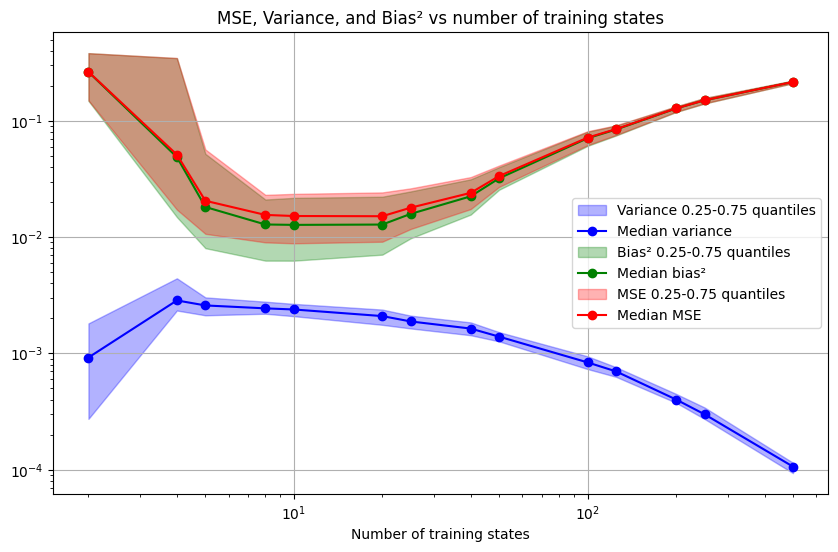

In [ ]:
biasvar_vs_nstates(
    povm=sic_povm(),
    target_observable=qutip.sigmaz(),
    n_states_list=[2, 4, 5, 8, 10, 20, 25, 40, 50, 100, 125, 200, 250, 500],
    n_realizations=100,
    statistics=1000,
    test_statistics=1000,
    quantiles=[0.25, 0.75],
    fix_total_statistics=True
);

n_states loop: 100%|██████████| 14/14 [00:29<00:00,  2.10s/it]


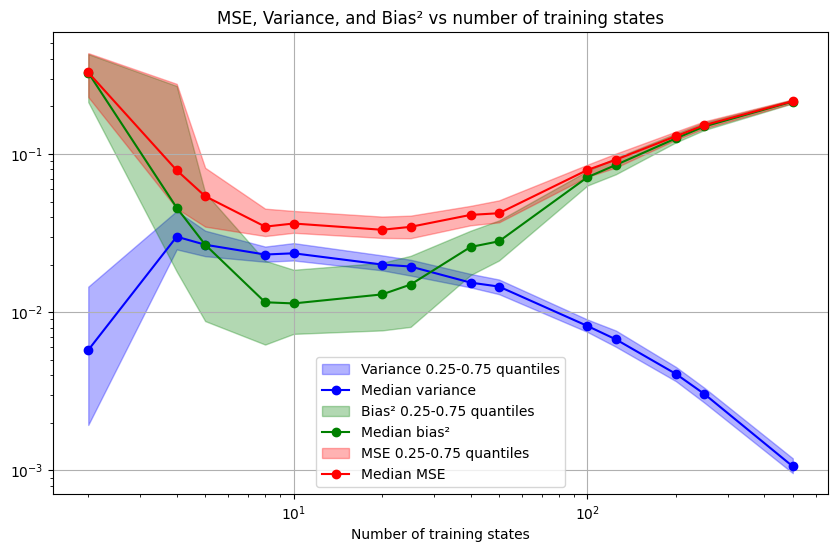

In [95]:
biasvar_vs_nstates(
    povm=sic_povm(),
    target_observable=qutip.sigmaz(),
    n_states_list=[2, 4, 5, 8, 10, 20, 25, 40, 50, 100, 125, 200, 250, 500],
    n_realizations=100,
    statistics=1000,
    test_statistics=100,
    quantiles=[0.25, 0.75],
    fix_total_statistics=True
);

Total statistics $10^4$

n_states loop: 100%|██████████| 14/14 [00:28<00:00,  2.04s/it]


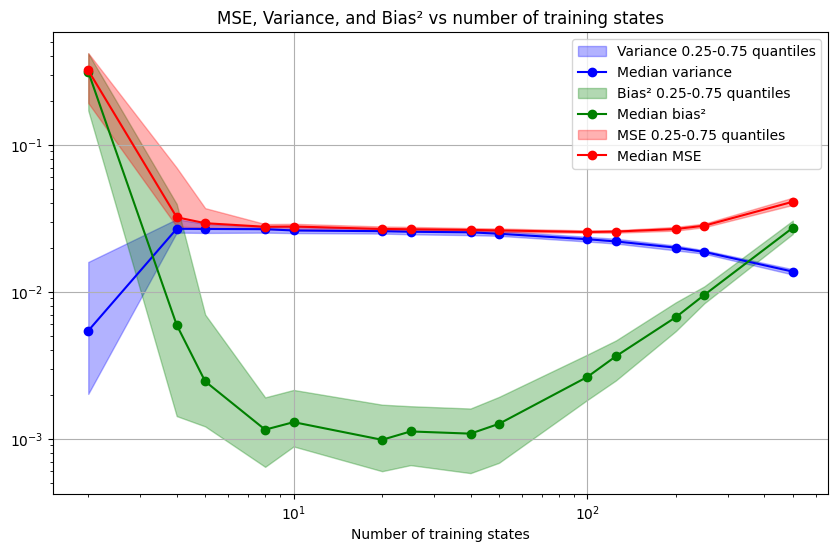

In [109]:
biasvar_vs_nstates(
    povm=sic_povm(),
    target_observable=qutip.sigmaz(),
    n_states_list=[2, 4, 5, 8, 10, 20, 25, 40, 50, 100, 125, 200, 250, 500],
    n_realizations=100,
    statistics=10000,
    test_statistics=100,
    quantiles=[0.25, 0.75],
    fix_total_statistics=True
);

n_states loop: 100%|██████████| 14/14 [00:28<00:00,  2.05s/it]


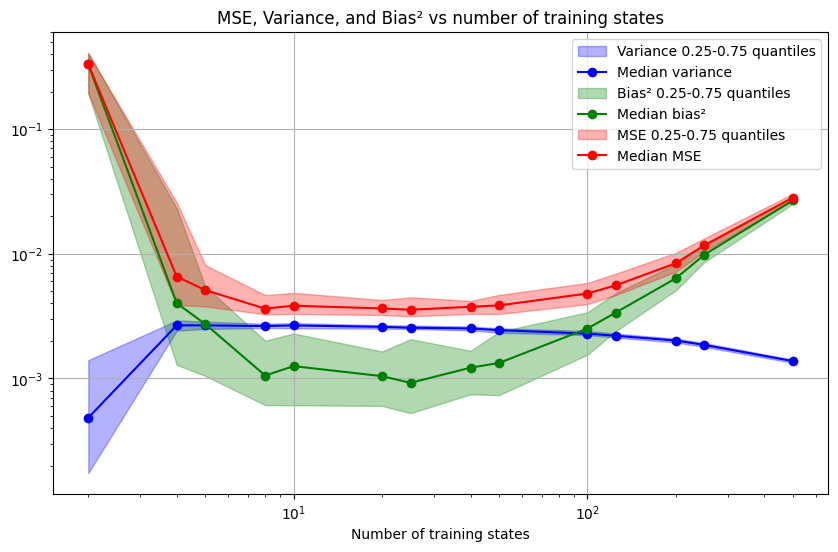

In [110]:
biasvar_vs_nstates(
    povm=sic_povm(),
    target_observable=qutip.sigmaz(),
    n_states_list=[2, 4, 5, 8, 10, 20, 25, 40, 50, 100, 125, 200, 250, 500],
    n_realizations=100,
    statistics=10000,
    test_statistics=1000,
    quantiles=[0.25, 0.75],
    fix_total_statistics=True
);

n_states loop: 100%|██████████| 14/14 [00:28<00:00,  2.05s/it]


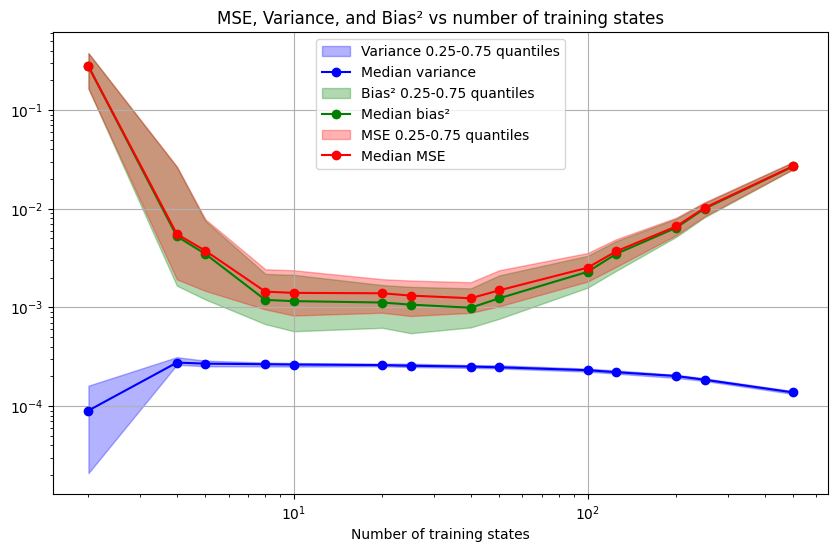

In [111]:
biasvar_vs_nstates(
    povm=sic_povm(),
    target_observable=qutip.sigmaz(),
    n_states_list=[2, 4, 5, 8, 10, 20, 25, 40, 50, 100, 125, 200, 250, 500],
    n_realizations=100,
    statistics=10000,
    test_statistics=10000,
    quantiles=[0.25, 0.75],
    fix_total_statistics=True
);

## Random rank-1 

n_states loop: 100%|██████████| 14/14 [00:31<00:00,  2.28s/it]


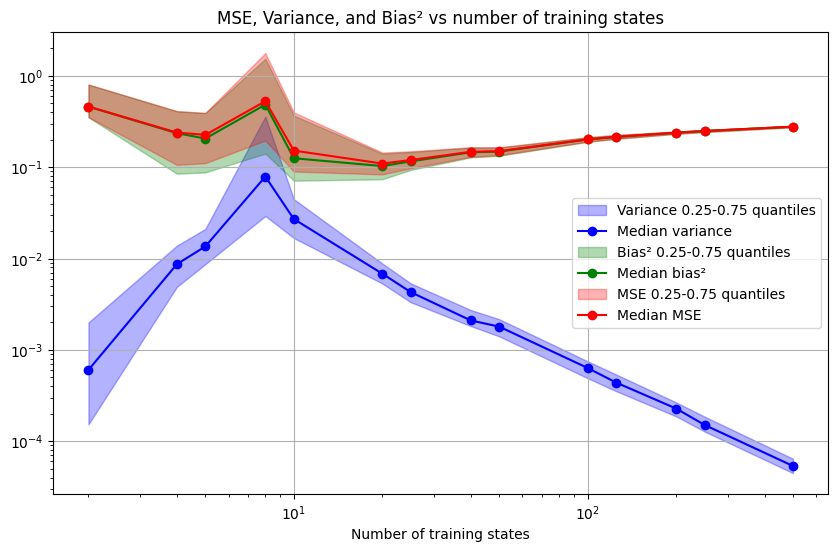

In [ ]:
biasvar_vs_nstates(
    povm=random_rank1_povm(dim=2, num_outcomes=8),
    target_observable=qutip.sigmaz(),
    n_states_list=[2, 4, 5, 8, 10, 20, 25, 40, 50, 100, 125, 200, 250, 500],
    n_realizations=100,
    statistics=1000,
    test_statistics=1000,
    quantiles=[0.25, 0.75],
    fix_total_statistics=True
);

n_states loop: 100%|██████████| 14/14 [00:32<00:00,  2.33s/it]


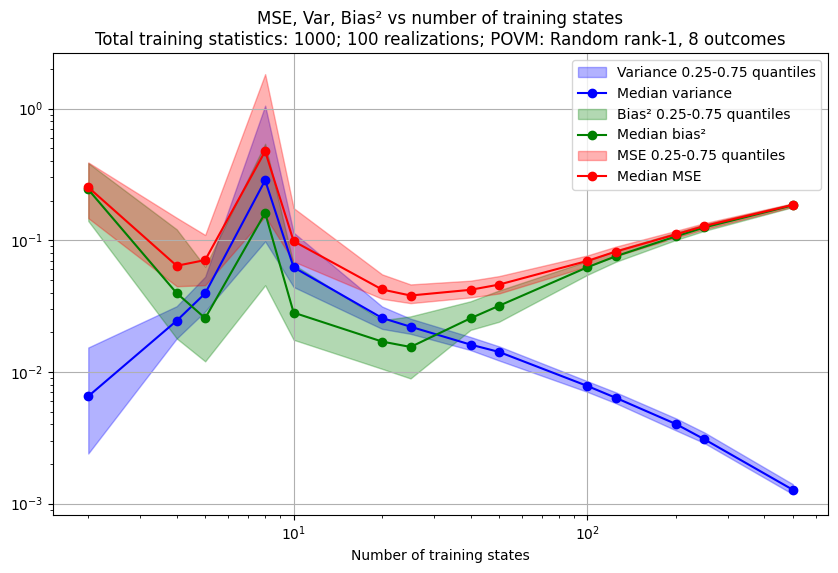

In [169]:
biasvar_vs_nstates(
    povm=random_rank1_povm(dim=2, num_outcomes=8),
    target_observable=qutip.sigmaz(),
    n_states_list=[2, 4, 5, 8, 10, 20, 25, 40, 50, 100, 125, 200, 250, 500],
    n_realizations=100,
    statistics=1000,
    test_statistics=100,
    quantiles=[0.25, 0.75],
    fix_total_statistics=True
);

# Training with specific states?

Total Statistics: 100%|██████████| 12/12 [00:02<00:00,  4.59it/s]


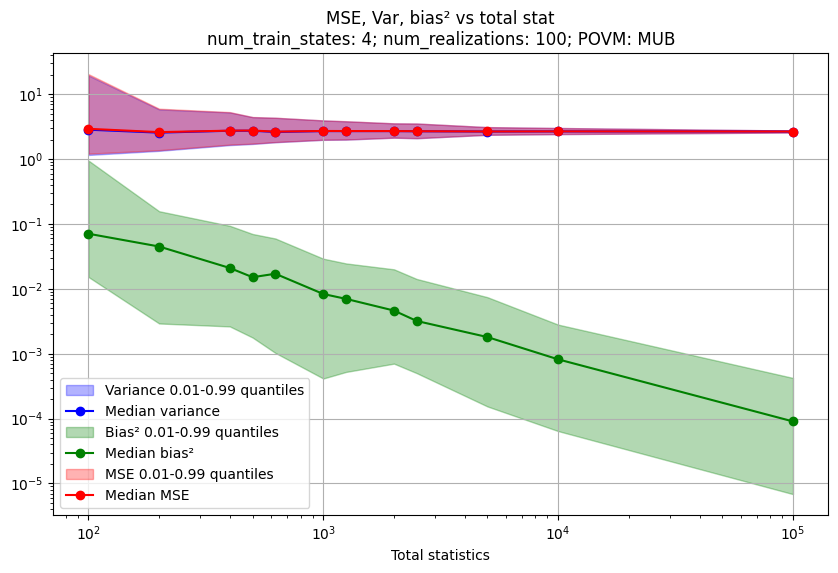

In [ ]:
biasvar_vs_statistics(
    povm=mub_povm(),
    train_states=sic_states,
    target_observable=qutip.sigmaz(),
    stats_list=[100, 200, 400, 500, 625,  1000,  1250,  2000,  2500,  5000, 10000, 100000],
    n_realizations=100,
    test_statistics=1,
    quantiles=[0.01, 0.99]
);

Total Statistics: 100%|██████████| 12/12 [00:02<00:00,  4.52it/s]


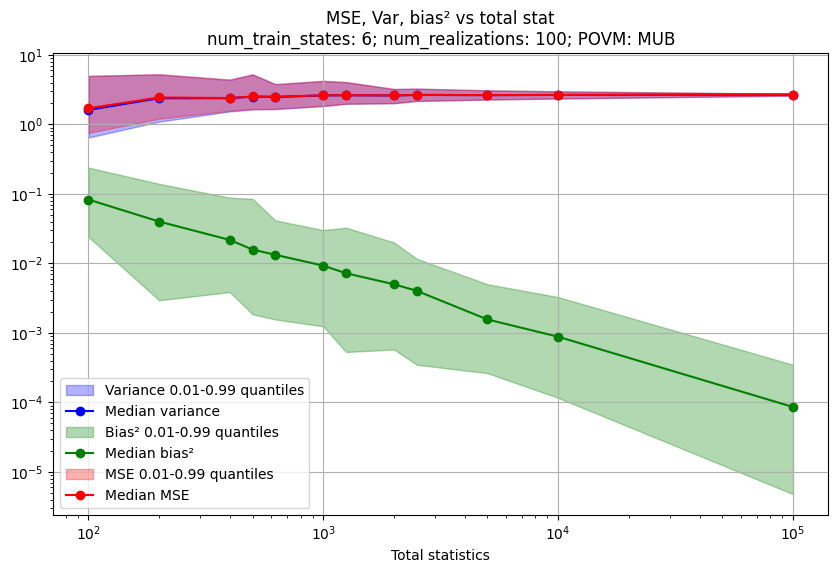

In [3]:
biasvar_vs_statistics(
    povm=mub_povm(), train_states=mub_states, target_observable=qutip.sigmaz(),
    stats_list=[100, 200, 400, 500, 625,  1000,  1250,  2000,  2500,  5000, 10000, 100000],
    n_realizations=100, test_statistics=1, quantiles=[0.01, 0.99],
    train_options={'truncate_singular_values': 4}
);

In [30]:
(qutip.sigmax() + qutip.sigmay()) / np.sqrt(2)

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=CSR, isherm=True
Qobj data =
[[0.        +0.j         0.70710678-0.70710678j]
 [0.70710678+0.70710678j 0.        +0.j        ]]

Total Statistics: 100%|██████████| 12/12 [00:02<00:00,  4.33it/s]


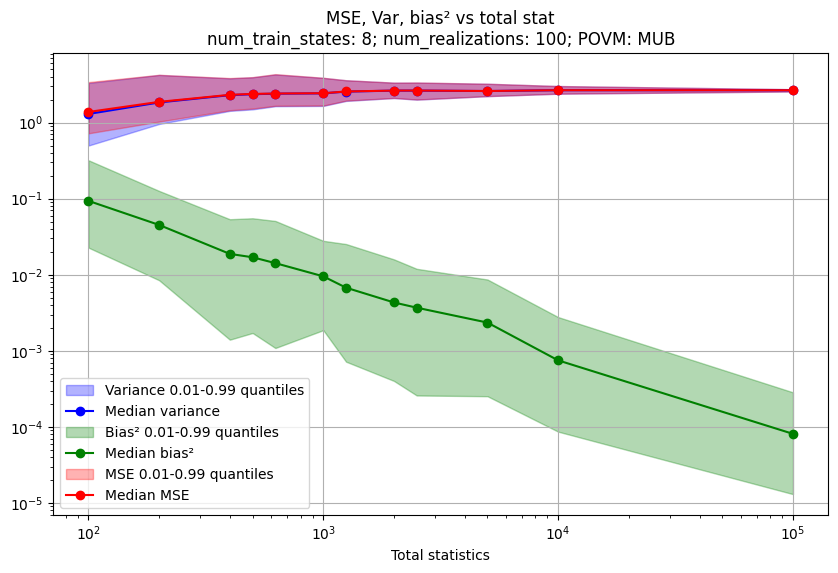

In [4]:
biasvar_vs_statistics(
    povm=mub_povm(), train_states=cube_states, target_observable=qutip.sigmaz(),
    stats_list=[100, 200, 400, 500, 625,  1000,  1250,  2000,  2500,  5000, 10000, 100000],
    n_realizations=100, test_statistics=1, quantiles=[0.01, 0.99],
    train_options={'truncate_singular_values': 4}
);

In [ ]:
biasvar_vs_statistics(
    povm=mub_povm(), train_states=[qutip.ket2dm(qutip.rand_ket(2, 1)) for _ in range(4)], target_observable=qutip.sigmaz(),
    stats_list=[100, 200, 400, 500, 625,  1000,  1250,  2000,  2500,  5000, 10000, 100000],
    n_realizations=100, test_statistics=1, quantiles=[0.01, 0.99],
    train_options={'truncate_singular_values': 4}
);

Total Statistics: 100%|██████████| 12/12 [00:02<00:00,  4.68it/s]


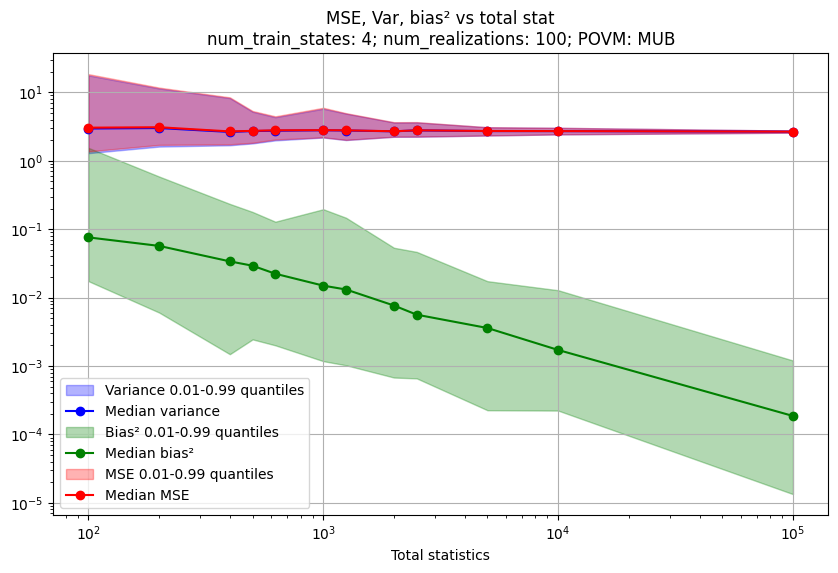

In [14]:
biasvar_vs_statistics(
    povm=mub_povm(), train_states=[qutip.ket2dm(qutip.rand_ket(2, 1)) for _ in range(4)], target_observable=qutip.sigmaz(),
    stats_list=[100, 200, 400, 500, 625,  1000,  1250,  2000,  2500,  5000, 10000, 100000],
    n_realizations=100, test_statistics=1, quantiles=[0.01, 0.99],
    train_options={'truncate_singular_values': 4}
);

Total Statistics: 100%|██████████| 12/12 [00:02<00:00,  4.40it/s]


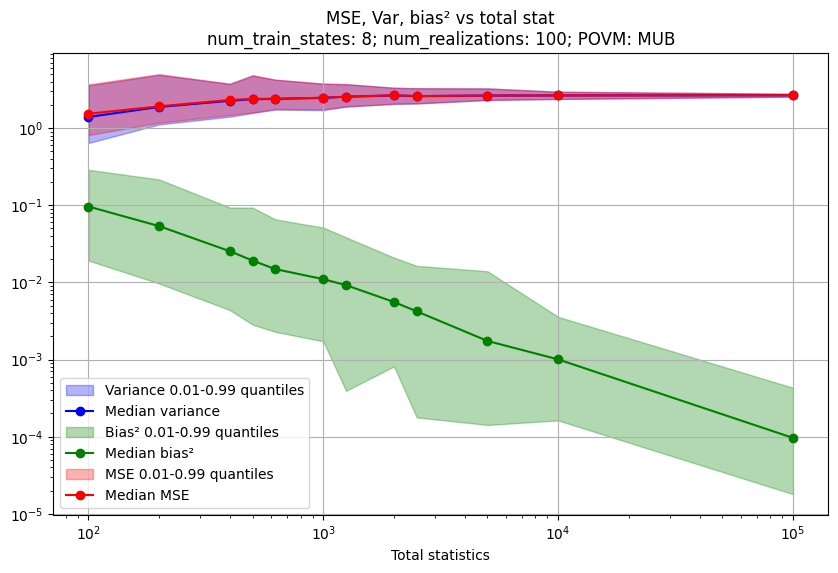

In [5]:
biasvar_vs_statistics(
    povm=mub_povm(), train_states=[qutip.ket2dm(qutip.rand_ket(2, 1)) for _ in range(8)], target_observable=qutip.sigmaz(),
    stats_list=[100, 200, 400, 500, 625,  1000,  1250,  2000,  2500,  5000, 10000, 100000],
    n_realizations=100, test_statistics=1, quantiles=[0.01, 0.99],
    train_options={'truncate_singular_values': 4}
);

Total Statistics: 100%|██████████| 12/12 [00:03<00:00,  3.85it/s]


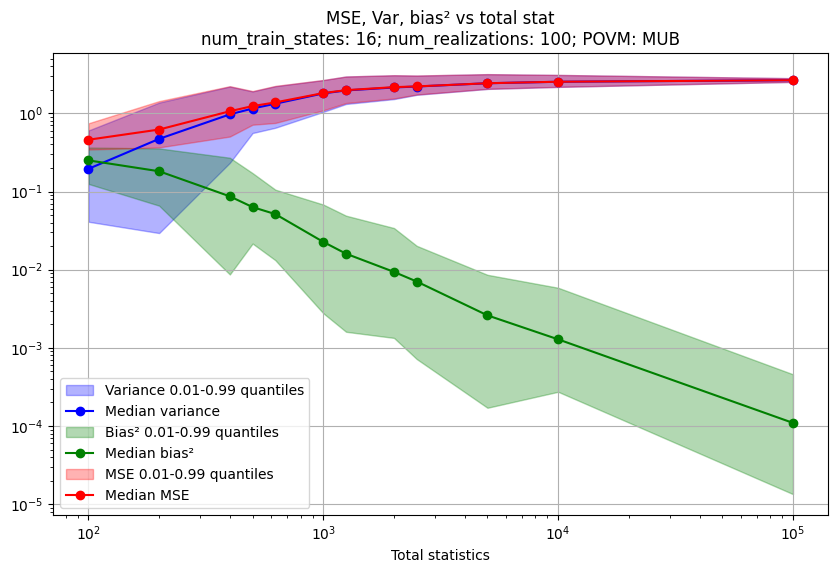

In [7]:
biasvar_vs_statistics(
    povm=mub_povm(), train_states=[qutip.ket2dm(qutip.rand_ket(2, 1)) for _ in range(16)], target_observable=qutip.sigmaz(),
    stats_list=[100, 200, 400, 500, 625,  1000,  1250,  2000,  2500,  5000, 10000, 100000],
    n_realizations=100, test_statistics=1, quantiles=[0.01, 0.99],
    train_options={'truncate_singular_values': 4}
);

Total Statistics: 100%|██████████| 12/12 [00:06<00:00,  1.73it/s]


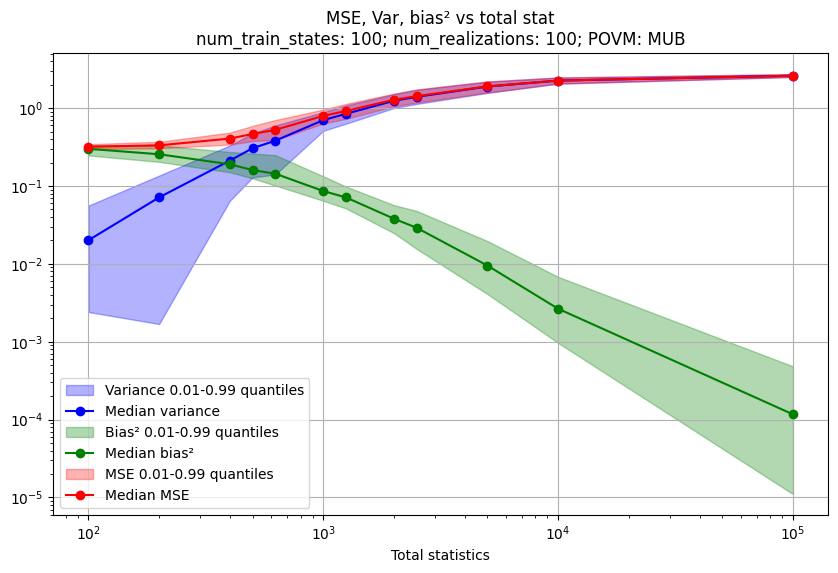

In [8]:
biasvar_vs_statistics(
    povm=mub_povm(), train_states=[qutip.ket2dm(qutip.rand_ket(2, 1)) for _ in range(100)], target_observable=qutip.sigmaz(),
    stats_list=[100, 200, 400, 500, 625,  1000,  1250,  2000,  2500,  5000, 10000, 100000],
    n_realizations=100, test_statistics=1, quantiles=[0.01, 0.99],
    train_options={'truncate_singular_values': 4}
);

## Misurando SIC

Total Statistics: 100%|██████████| 12/12 [00:01<00:00,  7.67it/s]


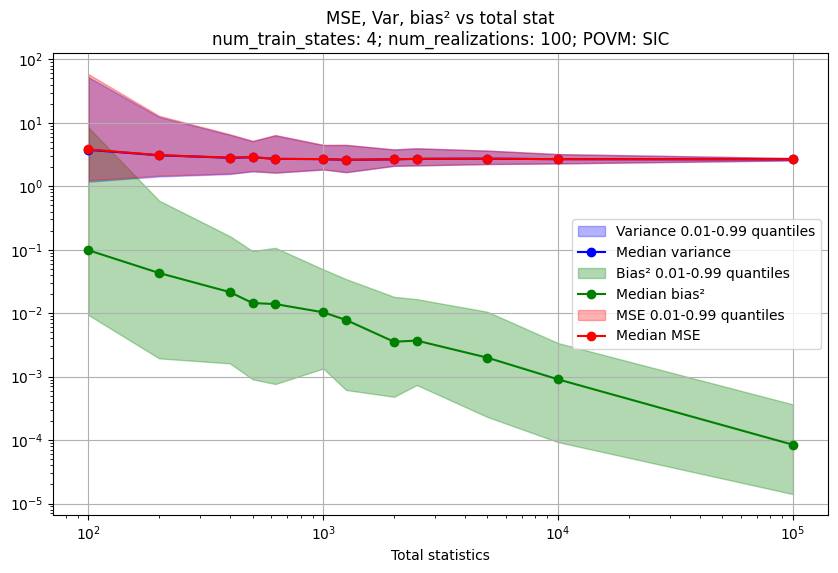

In [ ]:
biasvar_vs_statistics(
    povm=sic_povm(),
    train_states=sic_states,
    target_observable=qutip.sigmaz(),
    stats_list=[100, 200, 400, 500, 625,  1000,  1250,  2000,  2500,  5000, 10000, 100000],
    n_realizations=100,
    test_statistics=1,
    quantiles=[0.01, 0.99]
);

Total Statistics: 100%|██████████| 12/12 [00:01<00:00,  7.34it/s]


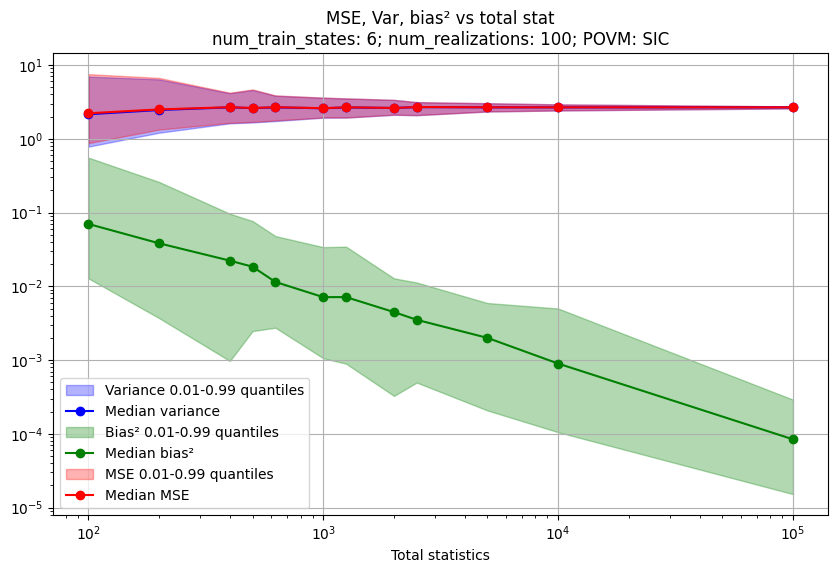

In [180]:
biasvar_vs_statistics(
    povm=sic_povm(),
    train_states=mub_states,
    target_observable=qutip.sigmaz(),
    stats_list=[100, 200, 400, 500, 625,  1000,  1250,  2000,  2500,  5000, 10000, 100000],
    n_realizations=100,
    test_statistics=1,
    quantiles=[0.01, 0.99]
);

Total Statistics: 100%|██████████| 12/12 [00:01<00:00,  7.00it/s]


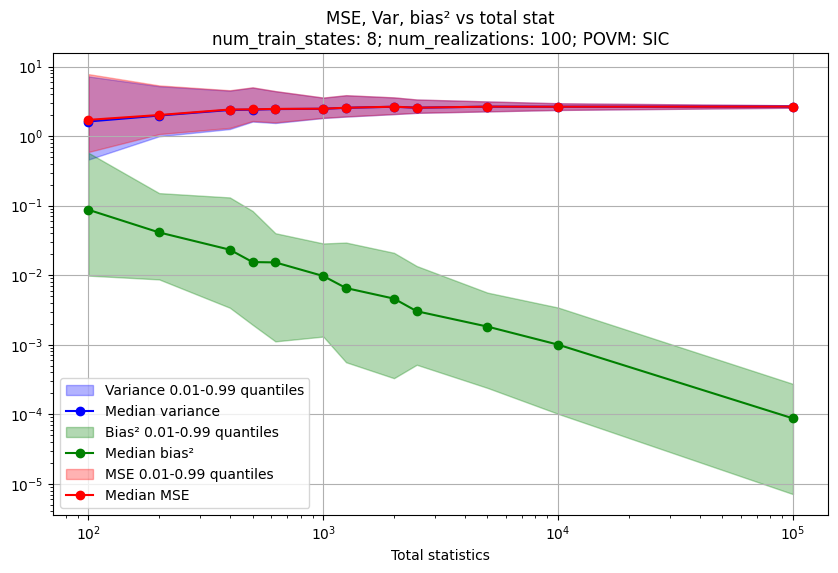

In [181]:
biasvar_vs_statistics(
    povm=sic_povm(),
    train_states=cube_states,
    target_observable=qutip.sigmaz(),
    stats_list=[100, 200, 400, 500, 625,  1000,  1250,  2000,  2500,  5000, 10000, 100000],
    n_realizations=100,
    test_statistics=1,
    quantiles=[0.01, 0.99]
);

Total Statistics: 100%|██████████| 12/12 [00:05<00:00,  2.14it/s]


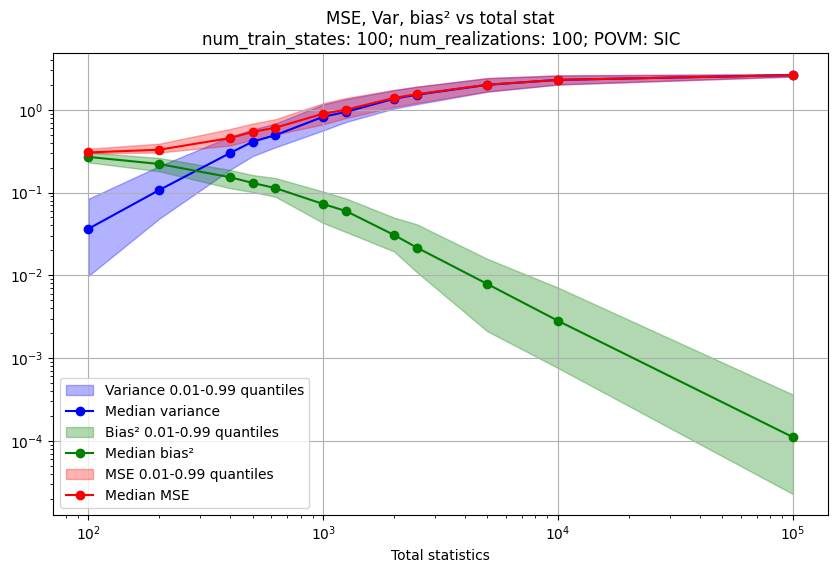

In [178]:
biasvar_vs_statistics(
    povm=sic_povm(),
    train_states = [qutip.ket2dm(qutip.rand_ket(2, 1)) for _ in range(100)],
    target_observable=qutip.sigmaz(),
    stats_list=[100, 200, 400, 500, 625,  1000,  1250,  2000,  2500,  5000, 10000, 100000],
    n_realizations=100,
    test_statistics=1,
    quantiles=[0.01, 0.99]
);

Total Statistics: 100%|██████████| 1/1 [00:03<00:00,  3.35s/it]


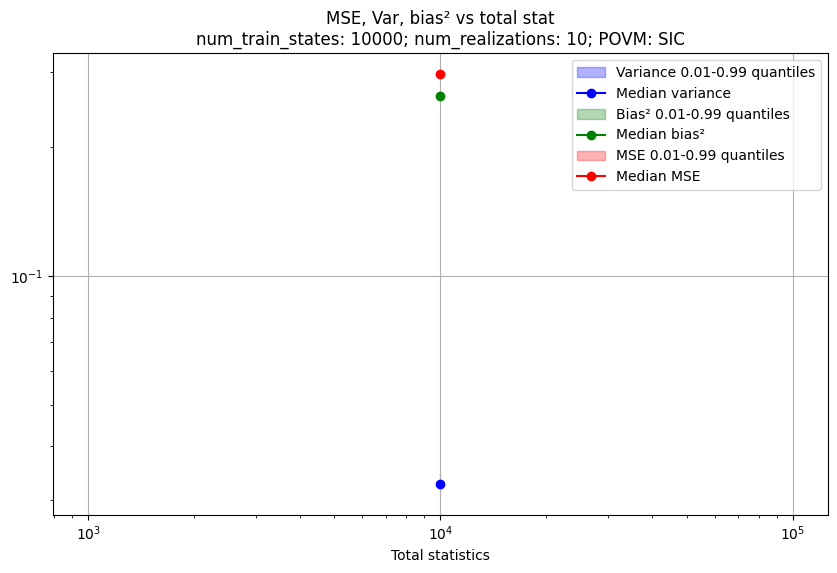

In [25]:
biasvar_vs_statistics(
    povm=sic_povm(),
    train_states = [qutip.ket2dm(qutip.rand_ket(2, 1)) for _ in range(10000)],
    target_observable=qutip.sigmaz(),
    stats_list=[10000],
    n_realizations=10,
    test_statistics=1,
    quantiles=[0.01, 0.99]
);

In [41]:
from src.shadow_tomography import frame_operator, shadow_estimator
from src.quantum_utils import vectorize_density_matrix, ket2dm

np.set_printoptions(precision=3, suppress=True)

frame_operator(sic_povm()).real
frame_operator(mub_povm()).real


array([[0.333, 0.   , 0.   , 0.   ],
       [0.   , 0.111, 0.   , 0.   ],
       [0.   , 0.   , 0.111, 0.   ],
       [0.   , 0.   , 0.   , 0.111]])

In [84]:
frame_operator([qutip.ket2dm(qutip.rand_ket(2, 1)) for _ in range(100)]) * 3 / 50

array([[ 3.   ,  0.115, -0.131,  0.071],
       [ 0.115,  0.946,  0.029, -0.113],
       [-0.131,  0.029,  1.008, -0.03 ],
       [ 0.071, -0.113, -0.03 ,  1.046]])

In [36]:
shadow_estimator(mub_povm())

[array([[ 2.+0.j,  0.+0.j],
        [ 0.+0.j, -1.+0.j]]),
 array([[-1.+0.j,  0.+0.j],
        [ 0.+0.j,  2.+0.j]]),
 array([[0.5+0.j, 1.5+0.j],
        [1.5+0.j, 0.5+0.j]]),
 array([[ 0.5+0.j, -1.5+0.j],
        [-1.5+0.j,  0.5+0.j]]),
 array([[0.5+0.j , 0. -1.5j],
        [0. +1.5j, 0.5+0.j ]]),
 array([[0.5+0.j , 0. +1.5j],
        [0. -1.5j, 0.5+0.j ]])]

In [44]:
ket2dm(vectorize_density_matrix(qutip.sigmaz())).real

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 2.]])

In [48]:
vec1 = vectorize_density_matrix(qutip.ket2dm(qutip.basis(2, 0)))
vec2 = vectorize_density_matrix(qutip.ket2dm(qutip.basis(2, 1)))
ket2dm(vec1).real + ket2dm(vec2).real

array([[1., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 1.]])

In [87]:
frame_operator([3 * effect for effect in mub_povm()])

array([[3., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [75]:
np.linalg.inv(frame_operator(mub_povm()))

array([[3., 0., 0., 0.],
       [0., 9., 0., 0.],
       [0., 0., 9., 0.],
       [0., 0., 0., 9.]])

In [77]:
# compute the vertices of a unit cube
vertices = np.array([[x, y, z] for x in [-1, 1] for y in [-1, 1] for z in [-1, 1]], dtype=float)
# normalize the vertices to lie on the unit sphere
vertices /= np.linalg.norm(vertices, axis=1)[:, np.newaxis]
# for each vector in vertices, compute the density matrix (I + v\cdot\sigma)/2
sigma_matrices = [qutip.sigmax(), qutip.sigmay(), qutip.sigmaz()]
cube_states = []
for v in vertices:
    sigma_v = sum(v[i] * sigma_matrices[i] for i in range(3))
    dm = (qutip.qeye(2) + sigma_v) / 2
    cube_states.append(dm)

# compute the frame operator corresponding to the set of cube_states
frame_op = frame_operator(cube_states)
frame_op * 3 / 4

array([[3., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [146]:
frame_operator(sic_states).real * 3 / 2

array([[ 3., -0.,  0.,  0.],
       [-0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.]])

In [134]:
sic_states = [2 * effect for effect in sic_povm()]
result = sum([qutip.tensor(dm, dm) for dm in sic_states]) / len(sic_states)
result.full().real * 6

array([[ 2., -0., -0.,  0.],
       [-0.,  1.,  1., -0.],
       [-0.,  1.,  1., -0.],
       [ 0., -0., -0.,  2.]])

In [138]:
sic_states = [2 * effect for effect in sic_povm()]
result = sum([qutip.tensor(dm, dm, dm) for dm in sic_states]) / len(sic_states)
result.full().real * 6 * 3

array([[ 5.   , -0.   , -0.   ,  0.   , -0.   ,  0.   ,  0.   ,  1.414],
       [-0.   ,  1.   ,  1.   , -0.   ,  1.   , -0.   , -0.   ,  0.   ],
       [-0.   ,  1.   ,  1.   , -0.   ,  1.   , -0.   , -0.   ,  0.   ],
       [ 0.   , -0.   , -0.   ,  2.   , -0.   ,  2.   ,  2.   , -0.   ],
       [-0.   ,  1.   ,  1.   , -0.   ,  1.   , -0.   , -0.   ,  0.   ],
       [ 0.   , -0.   , -0.   ,  2.   , -0.   ,  2.   ,  2.   , -0.   ],
       [ 0.   , -0.   , -0.   ,  2.   , -0.   ,  2.   ,  2.   , -0.   ],
       [ 1.414,  0.   ,  0.   , -0.   ,  0.   , -0.   , -0.   ,  4.   ]])

In [143]:
# mub_states = [3 * effect for effect in mub_povm()]
# result = sum([qutip.tensor(dm, dm) for dm in mub_states]) / len(mub_states)
# result.full().real * 6

mub_states = [3 * effect for effect in mub_povm()]
result = sum([qutip.tensor(dm, dm, dm) for dm in mub_states]) / len(mub_states)
result.full().real * 6 * 2

array([[3., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 1., 0., 1., 0., 0., 0.],
       [0., 1., 1., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 1., 1., 0.],
       [0., 1., 1., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 1., 1., 0.],
       [0., 0., 0., 1., 0., 1., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 3.]])

Total Statistics: 100%|██████████| 13/13 [00:04<00:00,  2.73it/s]


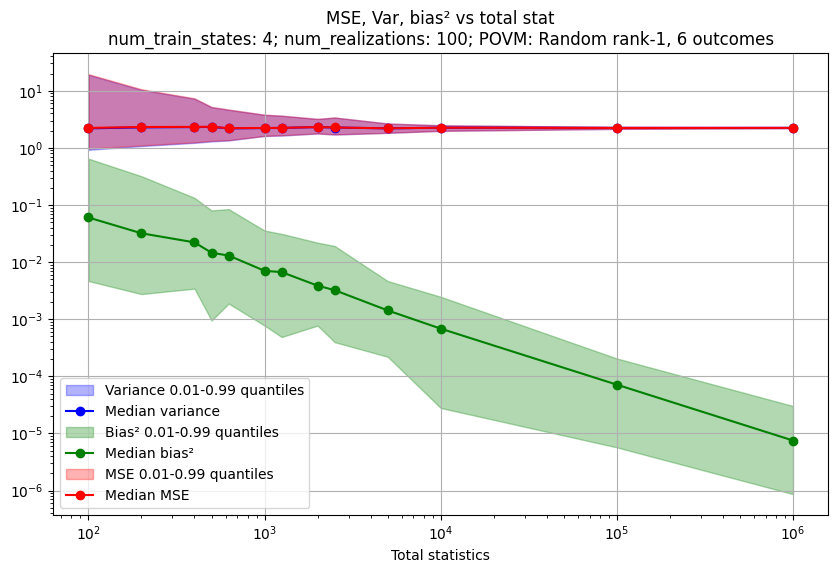

Total Statistics: 100%|██████████| 13/13 [00:04<00:00,  2.87it/s]


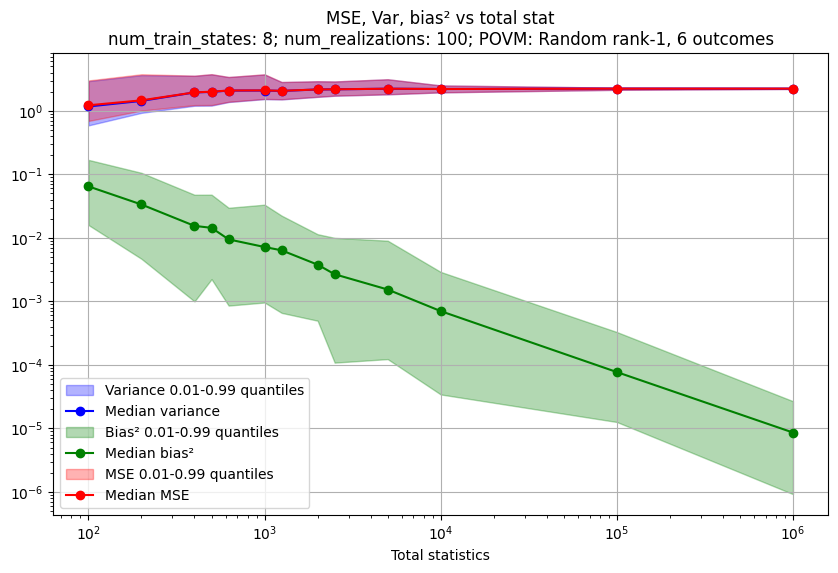

Total Statistics: 100%|██████████| 13/13 [00:04<00:00,  2.63it/s]


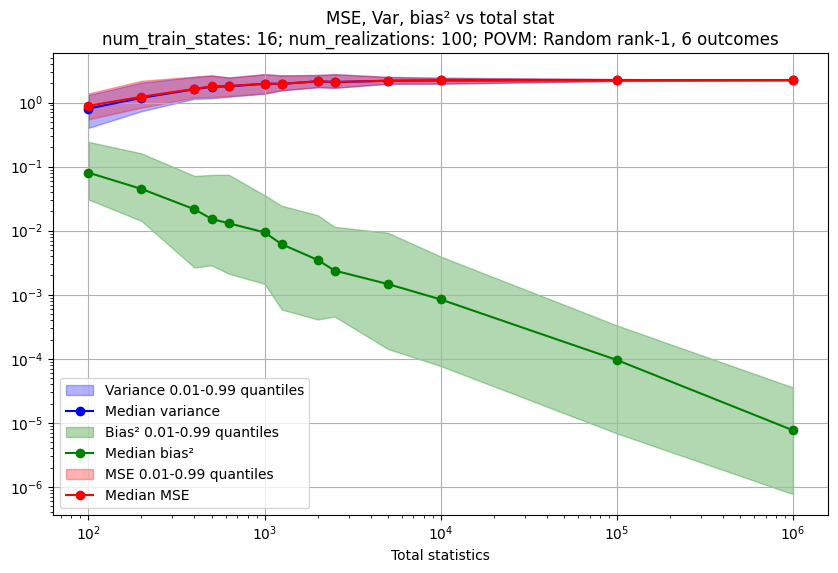

Total Statistics: 100%|██████████| 13/13 [00:09<00:00,  1.42it/s]


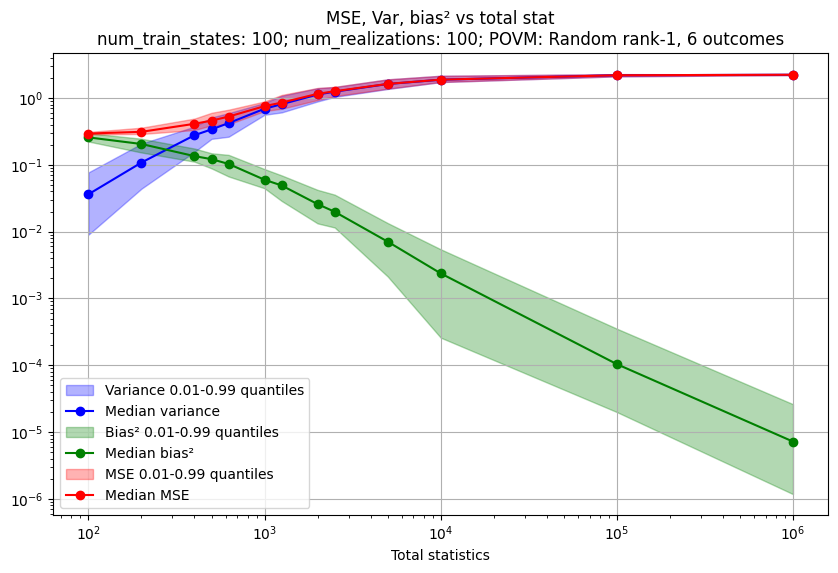

In [20]:
povm_ = random_rank1_povm(dim=2, num_outcomes=6)
biasvar_vs_statistics(
    povm=povm_, train_states=sic_states, target_observable=qutip.sigmaz(),
    stats_list=[100, 200, 400, 500, 625,  1000,  1250,  2000,  2500,  5000, 10000, 10**5, 10**6],
    n_realizations=100, test_statistics=1, quantiles=[0.01, 0.99],
    train_options={'truncate_singular_values': 4}
);

biasvar_vs_statistics(
    povm=povm_, train_states=cube_states, target_observable=qutip.sigmaz(),
    stats_list=[100, 200, 400, 500, 625,  1000,  1250,  2000,  2500,  5000, 10000, 10**5, 10**6],
    n_realizations=100, test_statistics=1, quantiles=[0.01, 0.99],
    train_options={'truncate_singular_values': 4}
);

biasvar_vs_statistics(
    povm=povm_, train_states=[qutip.ket2dm(qutip.rand_ket(2, 1)) for _ in range(16)], target_observable=qutip.sigmaz(),
    stats_list=[100, 200, 400, 500, 625,  1000,  1250,  2000,  2500,  5000, 10000, 10**5, 10**6],
    n_realizations=100, test_statistics=1, quantiles=[0.01, 0.99],
    train_options={'truncate_singular_values': 4}
);

biasvar_vs_statistics(
    povm=povm_, train_states=[qutip.ket2dm(qutip.rand_ket(2, 1)) for _ in range(100)], target_observable=qutip.sigmaz(),
    stats_list=[100, 200, 400, 500, 625,  1000,  1250,  2000,  2500,  5000, 10000, 10**5, 10**6],
    n_realizations=100, test_statistics=1, quantiles=[0.01, 0.99],
    train_options={'truncate_singular_values': 4}
);

Total Statistics: 100%|██████████| 9/9 [00:16<00:00,  1.82s/it]


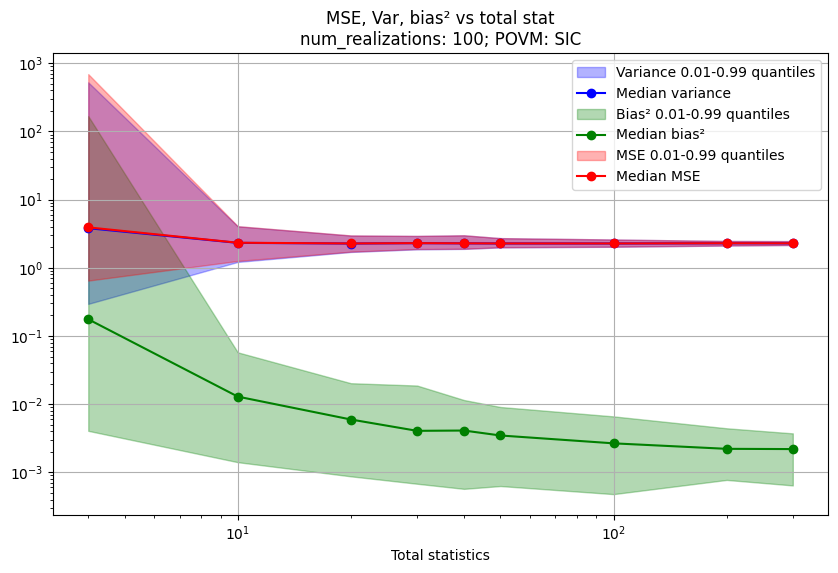

In [37]:
from src.qelm_utils import biasvar_vs_nstates_fixedstatperstate

biasvar_vs_nstates_fixedstatperstate(
    povm=sic_povm(),
    target_observable=qutip.sigmaz(),
    nstates_list=[4, 10, 20, 30, 40, 50, 100, 200, 300],
    stat_per_state=100,
    n_realizations=100,    
    test_statistics=1, quantiles=[0.01, 0.99],
    train_options={'truncate_singular_values': 4}
);

Total Statistics: 100%|██████████| 9/9 [00:16<00:00,  1.83s/it]


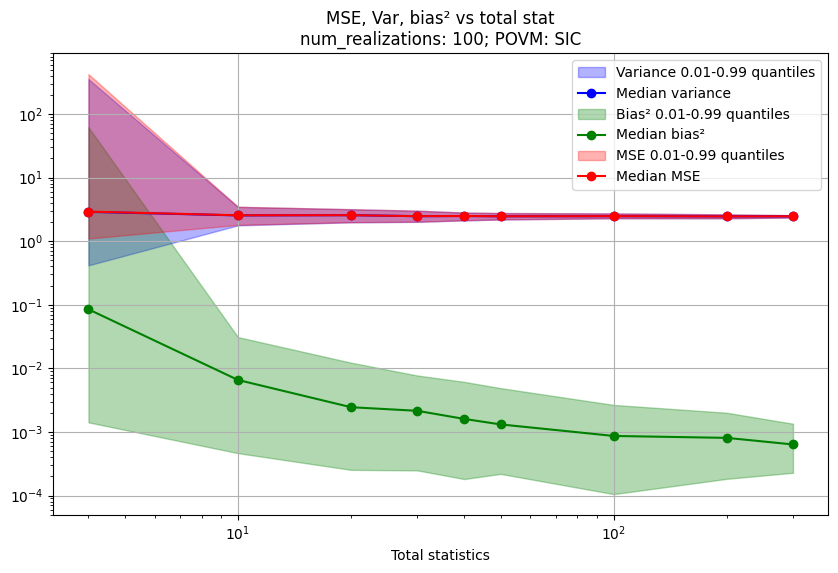

In [45]:
from src.qelm_utils import biasvar_vs_nstates_fixedstatperstate

biasvar_vs_nstates_fixedstatperstate(
    povm=sic_povm(),
    target_observable=qutip.sigmaz(),
    nstates_list=[4, 10, 20, 30, 40, 50, 100, 200, 300],
    stat_per_state=200,
    n_realizations=100,    
    test_statistics=1, quantiles=[0.01, 0.99],
    train_options={'truncate_singular_values': 4}
);

Total Statistics: 100%|██████████| 11/11 [00:24<00:00,  2.24s/it]


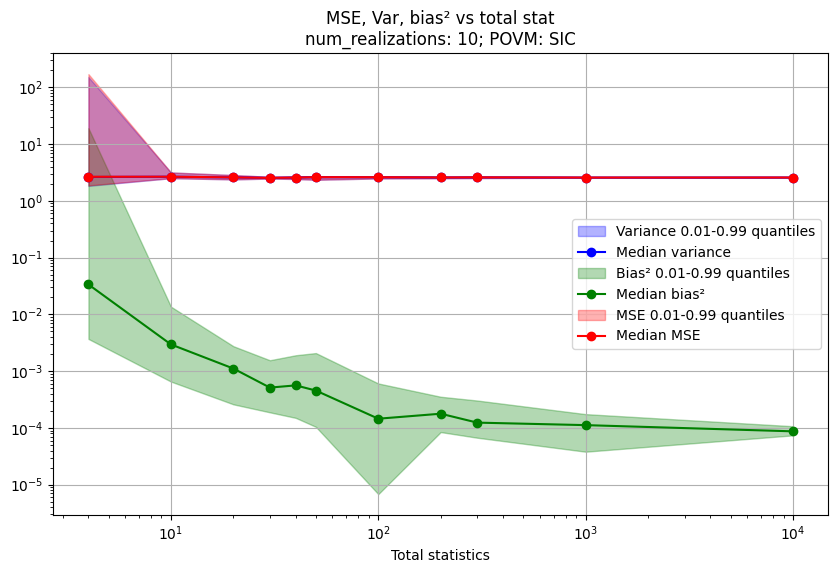

In [41]:
from src.qelm_utils import biasvar_vs_nstates_fixedstatperstate

biasvar_vs_nstates_fixedstatperstate(
    povm=sic_povm(),
    target_observable=qutip.sigmaz(),
    nstates_list=[4, 10, 20, 30, 40, 50, 100, 200, 300, 1000, 10000],
    stat_per_state=500,
    n_realizations=10,    
    test_statistics=1, quantiles=[0.01, 0.99],
    train_options={'truncate_singular_values': 4}
);

Total Statistics: 100%|██████████| 11/11 [00:25<00:00,  2.32s/it]


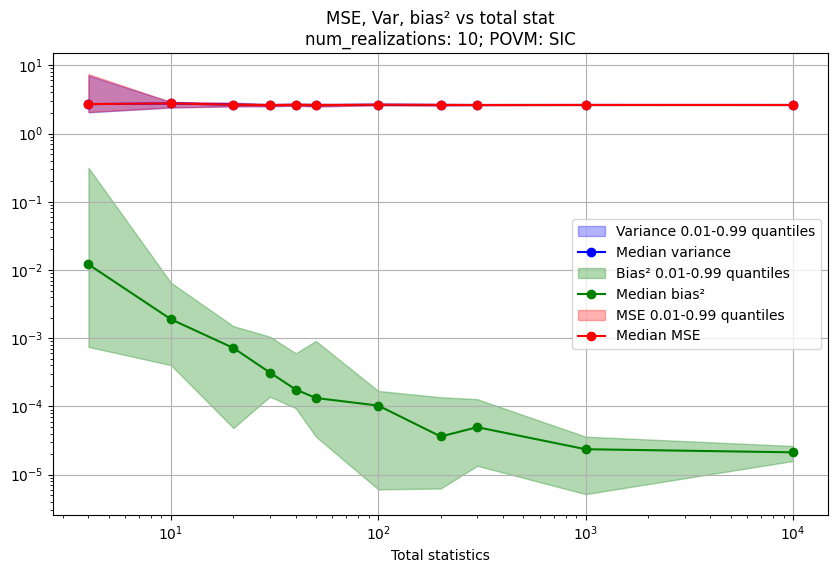

In [46]:
from src.qelm_utils import biasvar_vs_nstates_fixedstatperstate

biasvar_vs_nstates_fixedstatperstate(
    povm=sic_povm(),
    target_observable=qutip.sigmaz(),
    nstates_list=[4, 10, 20, 30, 40, 50, 100, 200, 300, 1000, 10000],
    stat_per_state=1000,
    n_realizations=10,
    test_statistics=1, quantiles=[0.01, 0.99],
    train_options={'truncate_singular_values': 4}
);

Total Statistics: 100%|██████████| 11/11 [00:41<00:00,  3.73s/it]


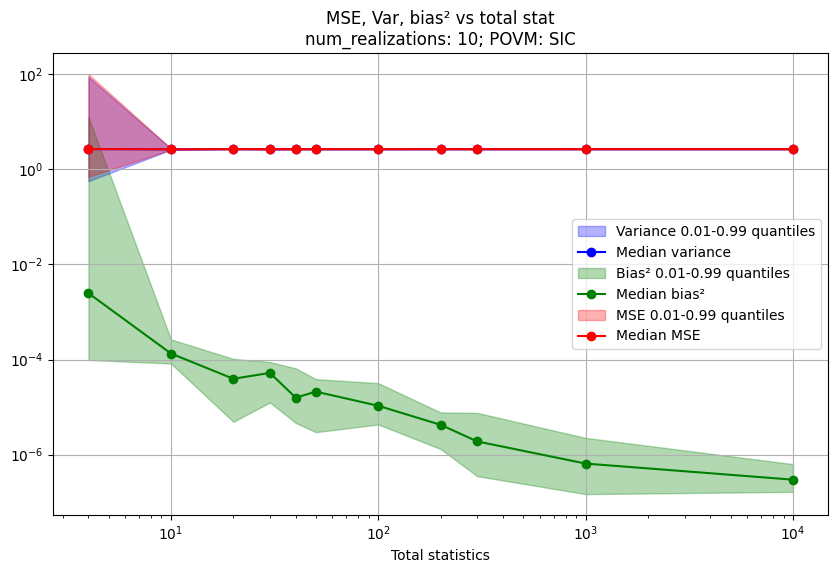

In [43]:
from src.qelm_utils import biasvar_vs_nstates_fixedstatperstate

biasvar_vs_nstates_fixedstatperstate(
    povm=sic_povm(),
    target_observable=qutip.sigmaz(),
    nstates_list=[4, 10, 20, 30, 40, 50, 100, 200, 300, 1000, 10000],
    stat_per_state=10000,
    n_realizations=10,    
    test_statistics=1, quantiles=[0.01, 0.99],
    train_options={'truncate_singular_values': 4}
);